Slovenske Alpe
==============

> "Vse to je moje življenje. Pot, ki ne pripelje nikamor drugam kakor na naslednjo pot in ta zopet na naslednje razpotje. Brez konca. [...] In to je zgodba, ki ni nastajala ob topli peči, temveč so besede rasle v meni, ko sem v potu svojega obraza preizkušal svojo voljo in meje človeške zmogljivosti; in preizkusil sem jih temeljito. Tako temeljito, da dobro vem, kako jih še niti od daleč nisem dosegel in da jih bodo mnogi prav kmalu presegli. V tem je veličina življenja."
(Nejc Zaplotnik)

Spodaj sledi kratka analiza podatkov tisoč sto petindvajsetih planinskih točk v Slovenskih Alpah.

In [342]:
# naložimo paket
import pandas as pd

# naložimo razpredelnico, s katero bomo delali
planinske_tocke = pd.read_csv(r'C:\Users\Andreja\Documents\Programiranje\Slovenske-Alpe\obdelani-podatki\planinske-tocke.csv')
bliznje_tocke = pd.read_csv(r'C:\Users\Andreja\Documents\Programiranje\Slovenske-Alpe\obdelani-podatki\bliznje-tocke.csv')
poti = pd.read_csv(r'C:\Users\Andreja\Documents\Programiranje\Slovenske-Alpe\obdelani-podatki\poti.csv')
vrste = pd.read_csv(r'C:\Users\Andreja\Documents\Programiranje\Slovenske-Alpe\obdelani-podatki\vrste.csv')

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 20 vrstic
pd.options.display.max_rows = 20


In [343]:
planinske_tocke

,ime,gorovje,višina (m),število ogledov,priljubljenost (mesto),število planinskih točk v okolici,število poti
0,Triglav,Julijske Alpe,2864,1148089,1,13,26
1,Montaž / Jôf di Montasio,Julijske Alpe,2753,622945,46,4,3
2,Škrlatica,Julijske Alpe,2740,654163,30,14,5
3,Mali Triglav,Julijske Alpe,2725,514378,210,12,3
4,Mangart,Julijske Alpe,2679,717796,8,2,8
...,...,...,...,...,...,...,...
1120,Sveti Mihael na Pečici,Karavanke,500,127654,1660,1,4
1121,Sveta Barbara v Zagradu,Karavanke,435,130,2578,1,3
1122,Sveti Miklavž (Sele),Karavanke,435,89,2608,1,1
1123,Zbelovski grad,Karavanke,400,122632,1678,1,3


In [344]:
planinske_tocke[['višina (m)', 'število ogledov', 'število poti']].sum()

višina (m)           1694074
število ogledov    352251075
število poti            3593
dtype: int64

In [348]:
planinske_tocke.ime.count()

1125

Primerjava vseh treh delov Alp
--------------------------------------------

In [349]:
planinske_tocke['zaokrožena višina'] = 100 * (planinske_tocke[['višina (m)']] // 100)
planinske_tocke

,ime,gorovje,višina (m),število ogledov,priljubljenost (mesto),število planinskih točk v okolici,število poti,zaokrožena višina
0,Triglav,Julijske Alpe,2864,1148089,1,13,26,2800
1,Montaž / Jôf di Montasio,Julijske Alpe,2753,622945,46,4,3,2700
2,Škrlatica,Julijske Alpe,2740,654163,30,14,5,2700
3,Mali Triglav,Julijske Alpe,2725,514378,210,12,3,2700
4,Mangart,Julijske Alpe,2679,717796,8,2,8,2600
...,...,...,...,...,...,...,...,...
1120,Sveti Mihael na Pečici,Karavanke,500,127654,1660,1,4,500
1121,Sveta Barbara v Zagradu,Karavanke,435,130,2578,1,3,400
1122,Sveti Miklavž (Sele),Karavanke,435,89,2608,1,1,400
1123,Zbelovski grad,Karavanke,400,122632,1678,1,3,400


PRIMERJAVA PO VIŠINI

Spodnji graf nam prikazuje porazdelitev planinskih točk po njihovivišini (zaokroženi na stotice). Graf priča, da se tudi Alpe v grobem trudijo slediti Gaussovi porazdelitvi.
Julijci so seveda bistveno najvišji, sledijo jim Karavanke in potem Kamniške Alpe. Še vedno pa smo precej nizki. Že samo, če se primerjamo z nekaterimi drugimi deli Alp v drugih državah. Kaj šele s Himalajo ali pa goro Olimp na Marsu (ki je v resnici vulkan), ki ima približno 22 000 m nadmorske višine. 

Zakaj so potem Slovenske gore tako zelo obiskane? Med jedrnatim pogovorom z mojim očetom, je ta dejal, da so naše Alpe ene redkih, resnično redkih gorskih območij, ki imajo sploh označene poti in so na težavnih mestih tudi primerno zavarovane. V ostalih državah za vzpone skoraj vedno potrebuješ vodiča. Zanimivo, kajne?


In [351]:
#definiramo razpredelnice z istimi podatki kot planinske_toske za posamezne dele Alp
julijci = planinske_tocke[planinske_tocke.gorovje == 'Julijske Alpe']
grintovci = planinske_tocke[planinske_tocke.gorovje == 'Kamniško Savinjske Alpe']
karavanke = planinske_tocke[planinske_tocke.gorovje == 'Karavanke']

In [18]:
planinske_tocke.groupby('zaokrožena višina').size()

zaokrožena višina
100      1
200      2
300      5
400     21
500     30
600     38
700     45
800     59
900     36
1000    52
1100    51
1200    61
1300    62
1400    68
1500    98
1600    75
1700    55
1800    63
1900    71
2000    66
2100    39
2200    26
2300    37
2400    29
2500    23
2600     8
2700     3
2800     1
dtype: int64

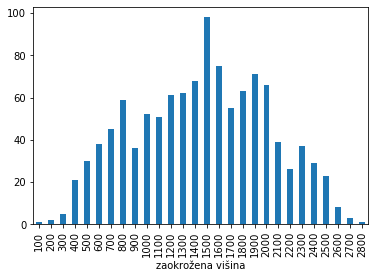

In [357]:
#porazdelitev po višini za Alpe
planinske_tocke[['ime', 'zaokrožena višina']].groupby('zaokrožena višina').size().plot.bar()

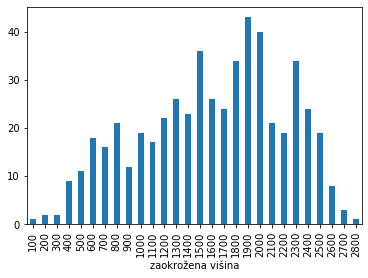

In [352]:
#porazdelitev po višini za Julijske Alpe
julijci.groupby('zaokrožena višina').size().plot.bar()

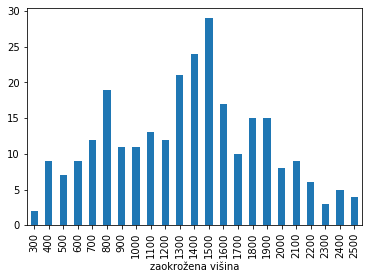

In [353]:
#porazdelitev po višini za Kamniške Alpe
grintovci.groupby('zaokrožena višina').size().plot.bar()

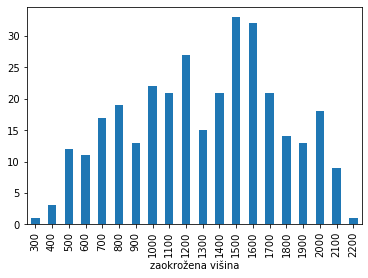

In [354]:
#porazdelitev za Karavanke
karavanke.groupby('zaokrožena višina').size().plot.bar()

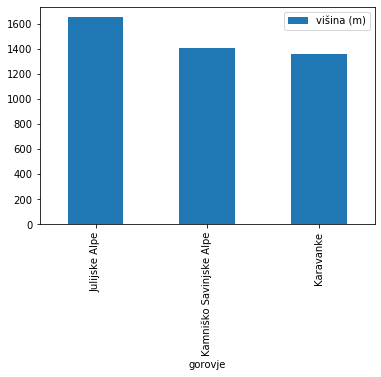

In [358]:
#graf povprečne višine točk za posamezne dele Alp
planinske_tocke[['gorovje', 'višina (m)']].groupby('gorovje').mean().plot.bar()

In [359]:
#povprečna višina točk
import math
planinske_tocke.groupby('gorovje')[['višina (m)']].mean().round() #ne dela apply(int)?(int())?


,višina (m)
gorovje,
Julijske Alpe,1650.0
Kamniško Savinjske Alpe,1402.0
Karavanke,1356.0


PRIMERJAVA PO PRILJUBLJENOSTI IN OGLEDIH

V resnici res nisem pričakovala, da bodo tri najbolj priljubljene planinske točke prav najvišji vrhovi posameznega dela Alp. Še bolj je zanimivo, da je takoj na četrtem mestu Storžič, četudi bolj vrhnji predel povsod prekrivajo ovčji kakci (in podplate čevljev in roke :)). Je pa to res eden lepše dosegljivih dvatisočakov in je zato zelo prijazen za družine.
Zanimivo je tudi, da je Mali Triglav šele na 210. mestu, medtem ko je Triglav kraljuje na prvem, saj večina planincev če ne ravno za vzpod na Triglav, vsaj za sestop z njega izbere pot čez Mali Triglav. Ta pot je zaradi takega navala ljudi že prav nevarno gladka.

Še vedno so najbolj priljubljeni Julijci, takoj za njimi Kamniške Alpe, Karavanke pa niti ne toliko.
(Morda na rezultate vpliva tudi dejstvo, da imajo Julijci bistveno več, skoraj toliko planinskih točk kot Kamniške Alpe in Karavanke skupaj.)


In [360]:
#število planinskih točk po gorovju
planinske_tocke.groupby('gorovje').ime.count()

gorovje
Julijske Alpe              531
Kamniško Savinjske Alpe    271
Karavanke                  323
Name: ime, dtype: int64

In [362]:
#točke po priljubljenosti
planinske_tocke[['ime', 'priljubljenost (mesto)', 'število ogledov']].sort_values('priljubljenost (mesto)', ascending = True).head(10)

,ime,priljubljenost (mesto),število ogledov
0,Triglav,1,1148089
531,Grintovec,2,820450
802,Stol,3,796209
549,Storžič,4,781018
817,Begunjščica,5,730770
582,Kamniška koča na Kamniškem sedlu,6,727958
99,Krn,7,722940
4,Mangart,8,717796
542,Ojstrica,9,717524
149,Viševnik,10,709922


In [363]:
#točke po priljubljenosti za Julijske Alpe
julijci[['ime', 'priljubljenost (mesto)', 'število ogledov']].sort_values('priljubljenost (mesto)', ascending = True).head(10)

,ime,priljubljenost (mesto),število ogledov
0,Triglav,1,1148089
99,Krn,7,722940
4,Mangart,8,717796
149,Viševnik,10,709922
273,Koča pri Triglavskih jezerih,11,697719
8,Jalovec,18,682623
18,Prisank / Prisojnik,19,674139
160,Debela peč,21,672652
79,Mala Mojstrovka,29,654706
2,Škrlatica,30,654163


In [364]:
#za Kamniške Alpe
grintovci[['ime', 'priljubljenost (mesto)', 'število ogledov']].sort_values('priljubljenost (mesto)', ascending = True).head(10)

,ime,priljubljenost (mesto),število ogledov
531,Grintovec,2,820450
549,Storžič,4,781018
582,Kamniška koča na Kamniškem sedlu,6,727958
542,Ojstrica,9,717524
533,Skuta,13,694659
560,Velika Raduha,14,694536
611,Gradišče (Velika planina),15,687291
636,Češka koča na Spodnjih Ravneh,23,669101
544,Brana,27,656650
658,Koča na Kriški gori,33,645111


In [365]:
#za Karavanke
karavanke[['ime', 'priljubljenost (mesto)', 'število ogledov']].sort_values('priljubljenost (mesto)', ascending = True).head(10)

,ime,priljubljenost (mesto),število ogledov
802,Stol,3,796209
817,Begunjščica,5,730770
944,Dom na Kofcah,12,697379
849,Golica,16,686565
808,Kordeževa glava (Peca),26,659090
813,Veliki vrh (Košuta),28,656176
878,Uršlja gora (Plešivec),31,646813
896,Roblekov dom na Begunjščici,32,646642
803,Vrtača,39,629286
1052,Boč,59,597437


In [366]:
#povprečje mest po priljubljenosti
planinske_tocke.groupby('gorovje')[['priljubljenost (mesto)']].mean().round() #ne dela apply(int)

,priljubljenost (mesto)
gorovje,
Julijske Alpe,876.0
Kamniško Savinjske Alpe,897.0
Karavanke,1271.0


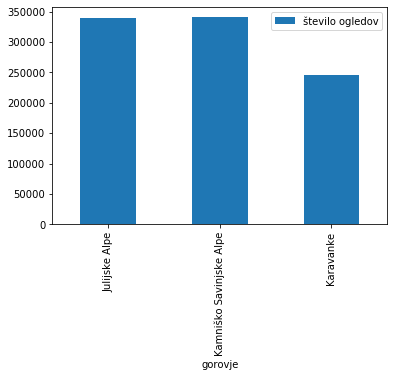

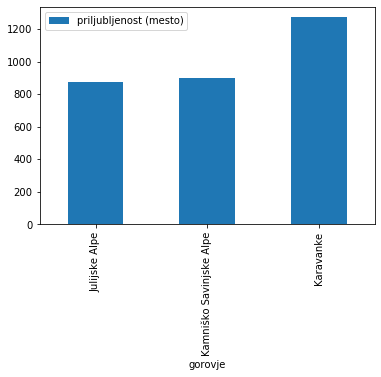

In [367]:
#povprečja mest po priljubljenosti in števila ogledov
planinske_tocke.groupby('gorovje')[['število ogledov' ]].mean().plot.bar()
planinske_tocke.groupby('gorovje')[['priljubljenost (mesto)' ]].mean().plot.bar()

In [28]:
#povprečje ogledov
planinske_tocke[['gorovje', 'število ogledov']].groupby('gorovje').mean().round() #ne dela appy(int)

,število ogledov
gorovje,
Julijske Alpe,339617.0
Kamniško Savinjske Alpe,340740.0
Karavanke,246360.0


PRIMERJAVA PO POTEH
Imamo le 10 planinskih točk, na katere ne vodi nobena "uradna" pot.

In [29]:
#število poti: Največ jih je v Julijcih, a na to gotovo vpliva, da imajo Julijci tudi največ planinskih točk
planinske_tocke[['gorovje', 'število poti']].groupby('gorovje').sum()

,število poti
gorovje,
Julijske Alpe,1434
Kamniško Savinjske Alpe,1124
Karavanke,1035


In [369]:
#največje število poti na goro za določeno gorovje
#največ poti vodi na Storžič
planinske_tocke[['gorovje', 'število poti']].groupby('gorovje').max()

,število poti
gorovje,
Julijske Alpe,26
Kamniško Savinjske Alpe,30
Karavanke,22


In [370]:
#planinske točke glede na število poti, ki vodijo nanjo
planinske_tocke[['ime', 'število poti']].sort_values('število poti', ascending = False)

,ime,število poti
549,Storžič,30
0,Triglav,26
591,Mali Grintovec,24
808,Kordeževa glava (Peca),22
149,Viševnik,21
...,...,...
530,Tolminska korita,0
219,Klečica,0
447,Slap Zaročenca,0
426,Koča na planini Stador,0


In [371]:
#Na deset planinskih točk ne vodi nobena "splošno znana" pot
planinske_tocke[['število poti']][planinske_tocke[['število poti']] == 0].count()

število poti    10
dtype: int64

Ali največ točk na planinski poti v Alpah predstavljajo vrhovi?
----------------------------------------------------------------------------------------
Ja, vrhove očitno predstavlja daleč največ planinskih točk. To velja tudi za posamezne dele Alp. Sledijo jim planine, koče in cerkve. 

Opazimo, da je razkol med vrhovi in ostalimi vrstami najmanjši pri Kamniško Savinjskih Alpah, in da so Julijske Alpe izrazito bolj vodnate.


In [372]:
#združimo planinske točke z vsemi vrstami, ki so
vrste_tock = pd.merge(planinske_tocke, vrste[~vrste.vrsta.isnull()], left_on = 'ime', right_on = 'točka')[['gorovje', 'višina (m)', 'število poti', 'točka', 'vrsta']]
vrste_tock

,gorovje,višina (m),število poti,točka,vrsta
0,Julijske Alpe,2864,26,Triglav,vrh
1,Julijske Alpe,2864,26,Triglav,bivak
2,Julijske Alpe,2753,3,Montaž / Jôf di Montasio,vrh
3,Julijske Alpe,2740,5,Škrlatica,vrh
4,Julijske Alpe,2725,3,Mali Triglav,vrh
...,...,...,...,...,...
1287,Karavanke,511,1,Sveti Donat,cerkev
1288,Karavanke,500,4,Sveti Mihael na Pečici,cerkev
1289,Karavanke,435,3,Sveta Barbara v Zagradu,vrh
1290,Karavanke,435,3,Sveta Barbara v Zagradu,cerkev


In [373]:
#število posameznih vrst v Alpah
vrste_tock.groupby('vrsta').size().sort_values(ascending = False)

vrsta
vrh        642
planina    218
koča       164
cerkev      82
bivak       66
slap        43
sedlo       41
jezero      36
dtype: int64

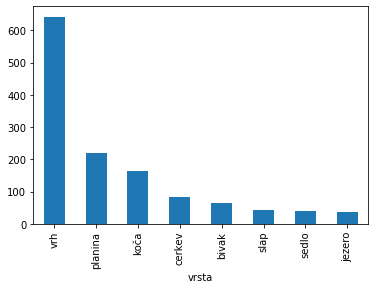

In [374]:
#še graf
vrste_tock.groupby('vrsta').size().sort_values(ascending = False).plot.bar()

In [375]:
#število vrhov na gorovje
vrste_tock[vrste_tock.vrsta == 'vrh'].groupby('gorovje').size()

gorovje
Julijske Alpe              309
Kamniško Savinjske Alpe    144
Karavanke                  189
dtype: int64

In [376]:
#število planinskih točk posamezne vrste na gorovje
vrste_tock[['gorovje', 'vrsta']].groupby(['vrsta', 'gorovje']).size()

vrsta   gorovje                
bivak   Julijske Alpe               44
        Kamniško Savinjske Alpe     16
        Karavanke                    6
cerkev  Julijske Alpe               19
        Kamniško Savinjske Alpe     34
                                  ... 
slap    Kamniško Savinjske Alpe      7
        Karavanke                    9
vrh     Julijske Alpe              309
        Kamniško Savinjske Alpe    144
        Karavanke                  189
Length: 24, dtype: int64

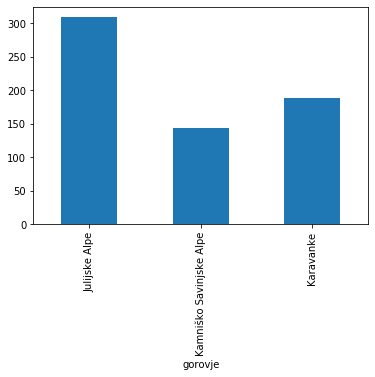

In [377]:
#vrhovi na gorovje
vrste_tock[vrste_tock.vrsta == 'vrh'][['gorovje', 'vrsta']].groupby('gorovje').size().plot.bar()

In [39]:
#število posameznih vrst za Julijce
vrste_tock[vrste_tock.gorovje == 'Julijske Alpe'].groupby('vrsta').size().sort_values(ascending = False)

vrsta
vrh        309
planina     86
koča        65
bivak       44
slap        27
jezero      26
cerkev      19
sedlo       14
dtype: int64

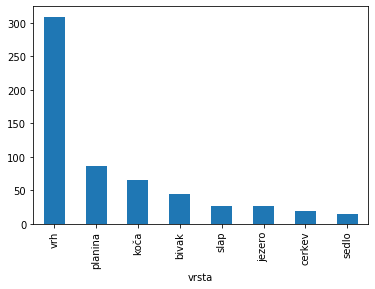

In [40]:
vrste_tock[vrste_tock.gorovje == 'Julijske Alpe'].groupby('vrsta').size().sort_values(ascending = False).plot.bar()

In [378]:
#za Kamniške Alpe
vrste_tock[vrste_tock.gorovje == 'Kamniško Savinjske Alpe'].groupby('vrsta').size().sort_values(ascending = False)

vrsta
vrh        144
planina     71
koča        53
cerkev      34
bivak       16
sedlo       12
slap         7
jezero       6
dtype: int64

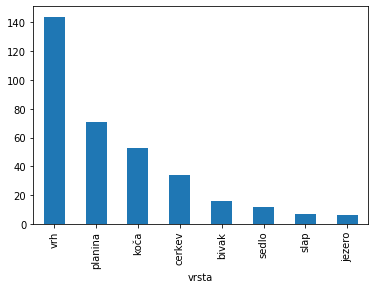

In [42]:
vrste_tock[vrste_tock.gorovje == 'Kamniško Savinjske Alpe'].groupby('vrsta').size().sort_values(ascending = False).plot.bar()

In [379]:
#za Karavanke
vrste_tock[vrste_tock.gorovje == 'Karavanke'].groupby('vrsta').size().sort_values(ascending = False)

vrsta
vrh        189
planina     61
koča        46
cerkev      29
sedlo       15
slap         9
bivak        6
jezero       4
dtype: int64

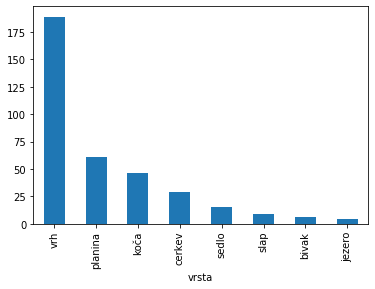

In [44]:
vrste_tock[vrste_tock.gorovje == 'Karavanke'].groupby('vrsta').size().sort_values(ascending = False).plot.bar()

Ali je število poti in ogledov povezanih s priljubljenostjo planinske točke?
----------------------------------------------------------------------------------------------------------

Opomba: Mesta priljubljenosti segajo preko števila planinskih točk v Alpah, saj je spletna stran upoštevala vso Slovenijo.

Prvi graf nam pove, da število poti v splošnem ni povezano s priljubljenostjo. Res pa je, da je razlika vidna, če primerjamo recimo prvih petsto najbolj priljubljenih lokacij z ostalimi. Pri večini povprečje poti ostaja enako, jih je pa kar nekaj, ki imajo veliko več poti. Natančneje, pri prvih petstotih najbolj priljubljenih lokacij je posprečje poti na eno planinsko točko enako pet poti, pri ostalih pa le dve.

Graf, ki kaže povezavo med priljubljenostjo lokacije in njenim številom ogledov na strani je veliko bolj jasen, skorajda lepo zvezen in padajoč. Pri prvih dvestotih najpriljubljenih lokacijah zelo hitro narašča, torej se število ogledov s priljubljenostjo hitro veča. Seveda v svoji nezveznosti močno izstopa Triglav. Skoraj do konca je graf približno linearen, torej ogledi naraščajo linearno s priljubljenostjo. Na koncu se graf prevesi v konstanto. Od 2000. mesta dalje so torej vse planinske točke deležne enake pozornosti.

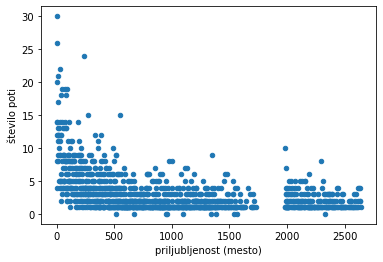

In [380]:
#število poti glede na priljubljenost
planinske_tocke[['število poti', 'priljubljenost (mesto)']].plot.scatter('priljubljenost (mesto)', 'število poti')

In [381]:
#poti_tocke = planinske_tocke[['število poti', 'priljubljenost (mesto)']].groupby('priljubljenost (mesto)')
#poti_tocke['območje_priljubljenosti'] = if poti_tocke[['priljubljenost (mesto']] <= 499 then 500 else (100 * (poti_tocke[['priljubljenost (mesto)']].apply(int()) // 100))
#poti_tocke = pd.merge

#!!!NE DELA!!! :( IDEJA: razdelimo točke glede na priljubljenost - prvih 500, drugih 500 ... in izračunam povprečje števila poti. Ne gre => poskusim z rezinami


#povprečno število poti za 500 najbolj priljubljenih točk - spodaj sledijo nadaljne rezine po 500 
planinske_tocke[['ime', 'priljubljenost (mesto)', 'število poti']].sort_values('priljubljenost (mesto)', ascending = True)[0:500].mean().round()

priljubljenost (mesto)    348.0
število poti                5.0
dtype: float64

In [69]:
planinske_tocke[['ime', 'priljubljenost (mesto)', 'število poti']].sort_values('priljubljenost (mesto)', ascending = True)[500:1000].mean().round()

priljubljenost (mesto)    1293.0
število poti                 2.0
dtype: float64

In [70]:
planinske_tocke[['ime', 'priljubljenost (mesto)', 'število poti']].sort_values('priljubljenost (mesto)', ascending = True)[1000:1500].mean().round()

priljubljenost (mesto)    2386.0
število poti                 2.0
dtype: float64

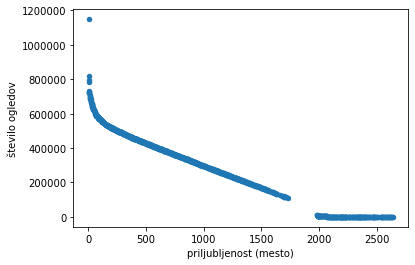

In [61]:
#število ogledov glede na priljubljenost
planinske_tocke[['število ogledov', 'priljubljenost (mesto)']].plot.scatter('priljubljenost (mesto)', 'število ogledov')

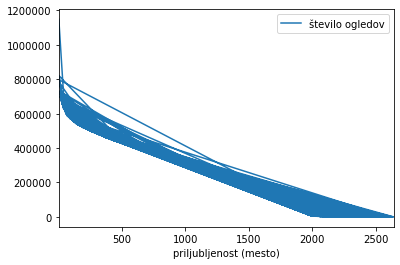

In [74]:
planinske_tocke[['število ogledov', 'priljubljenost (mesto)']].plot('priljubljenost (mesto)', 'število ogledov')

Ali je priljubljenost obiskov planinske točke povezana s številom gor v okolici?
-----------------------------------------------------------------------------------------------------------------
Graf ne kaže nobene povezanosti med tema dvema spremenljivkama.

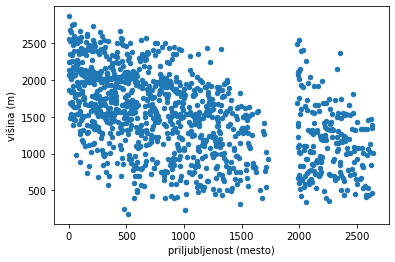

In [382]:
#višina točke glede na njeno priljubljenost
planinske_tocke[['višina (m)', 'priljubljenost (mesto)']].plot.scatter('priljubljenost (mesto)', 'višina (m)')

Ali je priljubljenost povezana z vrsto planinske točke?
------------------------------------------------------------------------------
Spodaj so prikazana povprečja mest glede na priljubljenost za posamezno vrsto. Kot pričakovano so koče seveda najbolj priljubljena destinacija. 

In [383]:
#povprečno mesto priljubljenosti za določeno vrsto točke
vrste_priljubljenost = pd.merge(planinske_tocke, vrste[~vrste.vrsta.isnull()], left_on = 'ime', right_on = 'točka')[['vrsta', 'priljubljenost (mesto)']]
vrste_priljubljenost.groupby('vrsta').mean().sort_values('priljubljenost (mesto)', ascending = True).round() #apply(int())

,priljubljenost (mesto)
vrsta,
koča,679.0
bivak,718.0
sedlo,891.0
vrh,929.0
planina,985.0
jezero,1030.0
slap,1168.0
cerkev,1268.0


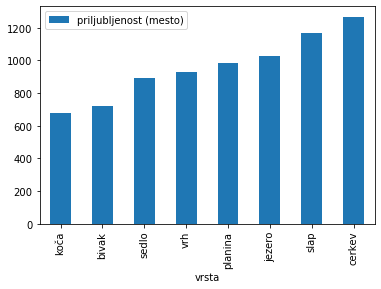

In [384]:
#še graf za zgornjo tabelo
vrste_priljubljenost.groupby('vrsta').mean().sort_values('priljubljenost (mesto)', ascending = True).plot.bar()

Ali je priljubljenost povezana z višino točke? 
----------------------------------------------------------------
V splošnem niti ne, čeprav lahko opazimo večinoma neenakomerno padanje priljubljenosti s padanjem višine.


In [201]:
#združimo točke z njihovimi bližnjimi točkami
visine_priljubljenost = pd.merge(planinske_tocke, bliznje_tocke[~bliznje_tocke.isnull()], left_on = 'ime', right_on = 'ime planinske točke')[['ime','ime bližnje točke', 'višina (m)', 'zaokrožena višina','višina bližnje točke (m)', 'priljubljenost (mesto)']]
visine_priljubljenost

,ime,ime bližnje točke,višina (m),zaokrožena višina,višina bližnje točke (m),priljubljenost (mesto)
0,Triglav,Mali Triglav,2864,2800,2725,1
1,Triglav,Glava v Zaplanji,2864,2800,2556,1
2,Triglav,Kredarica,2864,2800,2541,1
3,Triglav,Rž,2864,2800,2538,1
4,Triglav,Morbegna,2864,2800,2520,1
...,...,...,...,...,...,...
6588,Sveti Miklavž (Sele),Sveti Rok (Sele),435,400,582,2608
6589,Zbelovski grad,Ljubična gora,400,400,533,1678
6590,Studeniški grad,Boč,315,300,978,1489
6591,Studeniški grad,Formila na Boču,315,300,624,1489


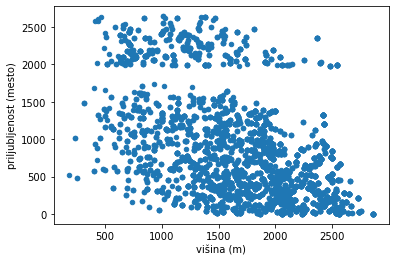

In [385]:
#priljubljenost glede na višino
visine_priljubljenost[['višina (m)', 'priljubljenost (mesto)']].plot.scatter('višina (m)', 'priljubljenost (mesto)')

In [386]:
#povprečno mesto priljubljenosti za posamezno zaokroženo višino
visine_priljubljenost.groupby('zaokrožena višina')[['priljubljenost (mesto)']].mean().round()

,priljubljenost (mesto)
zaokrožena višina,
100,516.0
200,744.0
300,1489.0
400,1331.0
500,1371.0
...,...
2400,577.0
2500,368.0
2600,186.0


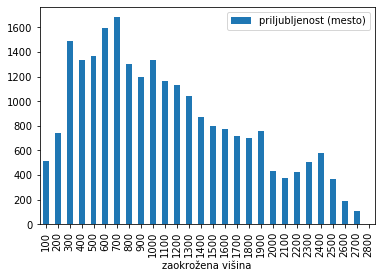

In [387]:
#še graf za zgornjo tabelo
visine_priljubljenost.groupby('zaokrožena višina')[['priljubljenost (mesto)']].mean().round().plot.bar()

Ali je višina planinske točke povezana z višinami bližnjih?
-----------------------------------------------------------------------------------
(hipoteza zastavljena dodatno - še neuspelo rešena :( )

In [253]:
tocka = pd.merge(planinske_tocke, bliznje_tocke, left_on = 'ime', right_on = 'ime planinske točke')[['ime', 'višina (m)']] #[['višina bližnje točke (m)']].mean().round()
povp_bliznje = visine_priljubljenost.groupby('ime')[['ime', 'višina bližnje točke (m)']].median()[ : ]

#visine_povprecje_bliznjih = pd.merge(tocka, povp_bliznje)

#visine_povprecje_bliznjih = pd.merge(
#visine_priljubljenost.groupby('ime')[['višina (m)', 'višina bližnje točke (m)']].head(),
#visine_priljubljenost.groupby('ime')[['višina bližnje točke (m)']].mean().head().round())



#visine_z_bliznjimi = pd.merge(tocka, povp_bliznje, left_on = 'ime', right_on = 'ime')
#visine_z_bliznjimi.groupby('ime').head()
#visine_priljubljenost

#tocka['povprečje višin bližnjih točk'] = visine_priljubljenost.groupby('ime')[['ime', 'višina bližnje točke (m)']].mean().round()



ime = pd.merge(tocka, povp_bliznje, left_on = 'ime', right_on = 'ime')
ime.groupby('ime').head()

visine_priljubljenost
tocka['povprečje višin bližnjih točk'] = visine_priljubljenost.groupby('ime')[['ime', 'višina bližnje točke (m)']].median()
#tocka.plot.scatter('višina (m)',
tocka

,ime,višina (m),povprečje višin bližnjih točk
0,Triglav,2864,NaN
1,Triglav,2864,NaN
2,Triglav,2864,NaN
3,Triglav,2864,NaN
4,Triglav,2864,NaN
...,...,...,...
6588,Sveti Miklavž (Sele),435,NaN
6589,Zbelovski grad,400,NaN
6590,Studeniški grad,315,NaN
6591,Studeniški grad,315,NaN


Ali lahko preko vrste predvidemo višino planinske točke?
-----------------------------------------------------------------------------------
Spodnji grafi pripadajo določeni vrsti planinske točke in prikazujejo njihovo število na določeni višini (po 100 m).

Večina bivakov leži med 1300 m in 2100 m, za jezera, cerkve in sedla težko kaj povemo, večina slapov med 400 m in 900 m, planin med 1000 m in 1600 m, skoraj vse koče ležijo pod 1800 m, več kot dve tretjini vrhov pa je nad 1500 m.


In [388]:
#združimo vrste in zaokrožene višine
vrste_visine = pd.merge(planinske_tocke, vrste[~vrste.vrsta.isnull()], left_on = 'ime', right_on = 'točka')[['zaokrožena višina', 'vrsta']]

vrste_visine[['zaokrožena višina', 'vrsta']].groupby(['vrsta', 'zaokrožena višina']).size().head(10)

vrsta  zaokrožena višina
bivak  500                  1
       700                  1
       1000                 2
       1100                 1
       1200                 2
       1300                 7
       1400                 8
       1500                 7
       1600                 6
       1700                 3
dtype: int64

In [389]:
#število točk določene vrste na višino
vrste_visine[['zaokrožena višina', 'vrsta']].groupby(['zaokrožena višina', 'vrsta']).size().head(10)

zaokrožena višina  vrsta 
200                jezero    1
                   slap      2
300                koča      1
                   slap      1
400                cerkev    6
                   jezero    3
                   koča      1
                   slap      4
                   vrh       7
500                bivak     1
dtype: int64

In [323]:
#BIVAK
vrste_visine[vrste_visine.vrsta == 'bivak'].groupby('zaokrožena višina').size()

zaokrožena višina
500     1
700     1
1000    2
1100    1
1200    2
1300    7
1400    8
1500    7
1600    6
1700    3
1800    6
1900    8
2000    5
2100    4
2200    1
2300    1
2400    1
2500    1
2800    1
dtype: int64

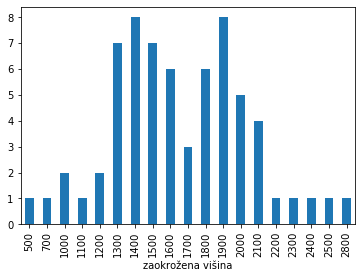

In [321]:
vrste_visine[vrste_visine.vrsta == 'bivak'].groupby('zaokrožena višina').size().plot.bar()

In [320]:
vrste_visine[vrste_visine.vrsta == 'jezero'].groupby('zaokrožena višina').size()

zaokrožena višina
200     1
400     3
500     1
600     4
700     3
800     2
900     2
1000    3
1200    1
1300    1
1400    1
1500    1
1600    4
1700    1
1800    4
1900    2
2000    1
2100    1
dtype: int64

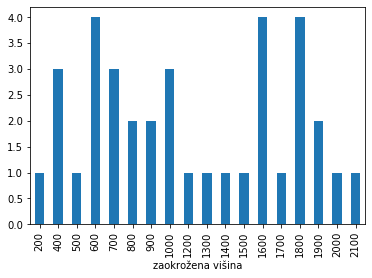

In [319]:
#JEZERO
vrste_visine[vrste_visine.vrsta == 'jezero'].groupby('zaokrožena višina').size().plot.bar()

In [318]:
#SLAP
vrste_visine[vrste_visine.vrsta == 'slap'].groupby('zaokrožena višina').size()

zaokrožena višina
200      2
300      1
400      4
500      4
600      5
700     12
800      7
900      4
1000     1
1100     1
1200     1
1300     1
dtype: int64

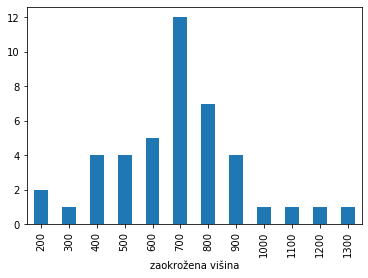

In [317]:
vrste_visine[vrste_visine.vrsta == 'slap'].groupby('zaokrožena višina').size().plot.bar()

In [316]:
#VRH
vrste_visine[vrste_visine.vrsta == 'vrh'].groupby('zaokrožena višina').size()

zaokrožena višina
400      7
500     12
600     11
700     16
800     26
900     12
1000    24
1100    19
1200    16
1300    15
1400    22
1500    46
1600    45
1700    43
1800    50
1900    59
2000    64
2100    32
2200    25
2300    36
2400    28
2500    22
2600     8
2700     3
2800     1
dtype: int64

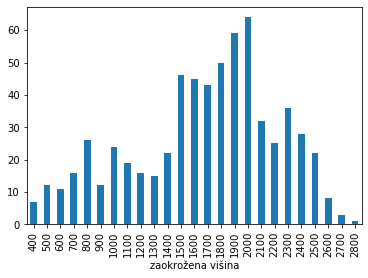

In [315]:
vrste_visine[vrste_visine.vrsta == 'vrh'].groupby('zaokrožena višina').size().plot.bar()

In [313]:
#PLANINA
vrste_visine[vrste_visine.vrsta == 'planina'].groupby('zaokrožena višina').size()

zaokrožena višina
500      1
600      1
700      2
800      7
900      5
1000    16
1100    17
1200    31
1300    30
1400    36
1500    39
1600    23
1700     6
1800     3
1900     1
dtype: int64

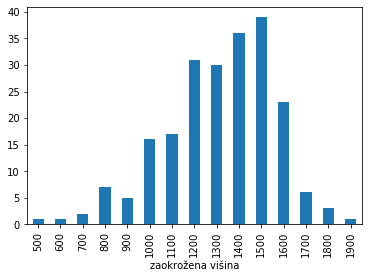

In [314]:
vrste_visine[vrste_visine.vrsta == 'planina'].groupby('zaokrožena višina').size().plot.bar()

In [312]:
#KOČA
vrste_visine[vrste_visine.vrsta == 'koča'].groupby('zaokrožena višina').size()

zaokrožena višina
300      1
400      1
500      3
600      6
700      6
800     11
900      8
1000    13
1100    11
1200    10
1300    16
1400    19
1500    21
1600    16
1700     5
1800     6
1900     1
2000     3
2100     3
2200     1
2300     1
2400     1
2500     1
dtype: int64

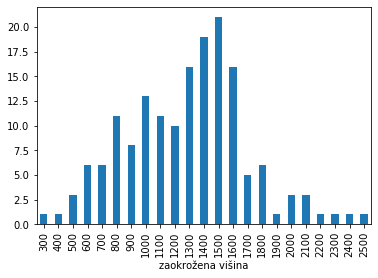

In [311]:
vrste_visine[vrste_visine.vrsta == 'koča'].groupby('zaokrožena višina').size().plot.bar()

In [310]:
#CERKEV
vrste_visine[vrste_visine.vrsta == 'cerkev'].groupby('zaokrožena višina').size()

zaokrožena višina
400      6
500      8
600     10
700      7
800     11
900      8
1000     7
1100     3
1200     5
1300     1
1400     2
1500     5
1600     5
1700     3
2500     1
dtype: int64

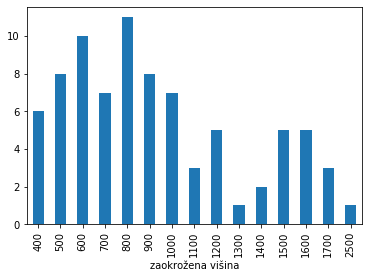

In [307]:
vrste_visine[vrste_visine.vrsta == 'cerkev'].groupby('zaokrožena višina').size().plot.bar()

In [309]:
#SEDLO
vrste_visine[vrste_visine.vrsta == 'sedlo'].groupby('zaokrožena višina').size()

zaokrožena višina
800     2
1000    3
1100    3
1200    4
1300    3
1400    4
1500    7
1600    2
1700    4
1800    3
1900    2
2000    1
2100    3
dtype: int64

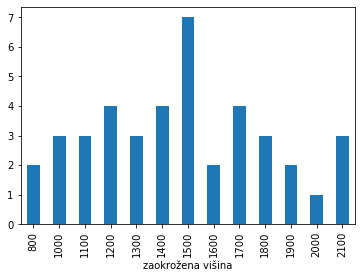

In [308]:
vrste_visine[vrste_visine.vrsta == 'sedlo'].groupby('zaokrožena višina').size().plot.bar()

Analiza po zahtevnosti poti (začetek)
-----------------------------------------------------
Vidimo, da imamo v naših Alpah največ lahkih poti.

In [390]:
#združimo poti z zahtevnostmi
pot = pd.merge(planinske_tocke, poti[~poti.zahtevnost.isnull()], left_on = 'ime', right_on = 'ime planinske točke')[['ime', 'gorovje', 'pot', 'zahtevnost']]

pot[['ime', 'zahtevnost']].groupby('zahtevnost').count()

,ime
zahtevnost,
alpinistični vzpon,12
delno zahtevna neoznačena pot,98
delno zahtevna označena pot,277
izjemno zahtevna označena pot,29
lahka neoznačena steza,773
lahka označena pot,1528
lahko brezpotje,142
ni podatka,5
zahtevna neoznačena steza,85


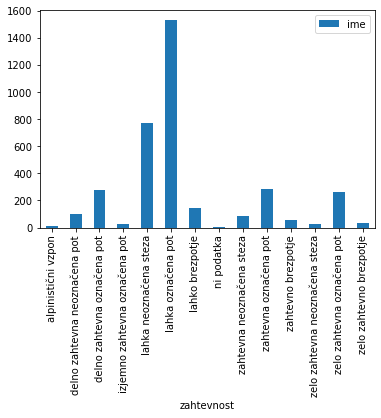

In [328]:
pot[['ime', 'zahtevnost']].groupby('zahtevnost').count().plot.bar()

In [392]:
#število poti po zahtevnosti za določeno gorovje
pot[['zahtevnost', 'gorovje']].groupby(['zahtevnost', 'gorovje']).size()

zahtevnost                     gorovje                
alpinistični vzpon             Julijske Alpe               6
                               Kamniško Savinjske Alpe     2
                               Karavanke                   4
delno zahtevna neoznačena pot  Julijske Alpe              40
                               Kamniško Savinjske Alpe    26
                                                          ..
zelo zahtevna označena pot     Kamniško Savinjske Alpe    98
                               Karavanke                  27
zelo zahtevno brezpotje        Julijske Alpe              25
                               Kamniško Savinjske Alpe     7
                               Karavanke                   4
Length: 41, dtype: int64

Sklepna misel
---------------------
1. Nikoli več ne bom v imenu stolpca uporabila oklepaje.
2. Analiza se je tu šele začela, še posebaj po zahtevnosti poti. (A polnoč se neustavljivo bliža.)
3. Povsod, kjer je float bi moral biti int, ampak mi ni uspelo.

> "Kdor išče cilj, bo ostal prazen, ko ga bo dosegel, kdor pa najde pot, bo cilj vedno nosil v sebi." 
(Nejc Zaplotnik)